# Pandas


In [54]:
import numpy as np
import pandas as pd
import matplotlib
from  matplotlib import pyplot
import sys

%matplotlib inline

In [55]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)

Python version 3.6.1 |Anaconda 4.4.0 (64-bit)| (default, May 11 2017, 13:25:24) [MSC v.1900 64 bit (AMD64)]
Pandas version 0.20.1


### Let's start with basics

In [56]:
# Many ways to construct a DataFrame
# We pass a dict of {column name: column values}
np.random.seed(42)
df = pd.DataFrame({'A': [1, 2, 3], 'B': [True, True, False],
                   'C': np.random.randn(3)},
                  index=['a', 'b', 'c'])  # also this weird index thing
df

,A,B,C
a,1,True,0.496714
b,2,True,-0.138264
c,3,False,0.647689


## Selecting
Our first improvement over numpy arrays is labeled indexing. We can select subsets by column, row, or both. Column selection uses the regular python machinery. Pass in a single column label 'A' or a list of labels ['A', 'C'] to select subsets of the original DataFrame.

In [57]:
# Single column, reduces to a Series
df['A']

a    1
b    2
c    3
Name: A, dtype: int64

In [58]:
cols = ['A', 'C']
df[cols]

,A,C
a,1,0.496714
b,2,-0.138264
c,3,0.647689


For row-wise selection, use the special .loc accessor.

*Purely label-location based indexer for selection by label.*

In [59]:
df.loc[['a', 'b']]

,A,B,C
a,1,True,0.496714
b,2,True,-0.138264



When your index labels are ordered, you can use ranges to select rows or columns.

In [60]:
df.loc['a':'b']

,A,B,C
a,1,True,0.496714
b,2,True,-0.138264


In [61]:
df.loc['a':'c']

,A,B,C
a,1,True,0.496714
b,2,True,-0.138264
c,3,False,0.647689


Notice that the slice is inclusive on both sides, unlike your typical slicing of a list. Sometimes, you'd rather slice by position instead of label. .iloc has you covered:

*Purely integer-location based indexing for selection by position.*

In [62]:
df.iloc[0:2]

,A,B,C
a,1,True,0.496714
b,2,True,-0.138264


In [63]:
df.loc['a':'b', ['A', 'C']]

,A,C
a,1,0.496714
b,2,-0.138264


In [64]:
df['A']

a    1
b    2
c    3
Name: A, dtype: int64

In [65]:
df.loc[:, 'A']

a    1
b    2
c    3
Name: A, dtype: int64

In [66]:
df.index

Index(['a', 'b', 'c'], dtype='object')

### Read CSV files

In [67]:
pd.read_csv?

In [68]:
apple_stocks = pd.read_csv(r'Data/AAPL.csv', index_col='Date', parse_dates=['Date']).squeeze()

In [69]:
apple_stocks

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-09-13,96.767143,97.928574,96.395714,97.568573,88.155037,149590000
2012-09-14,98.565712,99.568573,98.269997,98.754288,89.226341,150118500
2012-09-17,99.907143,99.971428,99.230003,99.968575,90.323479,99507800
2012-09-18,99.982857,100.332855,99.488571,100.272858,90.598404,93375800
2012-09-19,100.037140,100.570000,99.938568,100.300003,90.622932,81718700
2012-09-20,99.879997,100.008568,99.088570,99.814285,90.184090,84142100
2012-09-21,100.344284,100.724289,99.908569,100.012856,90.363457,142897300
2012-09-24,98.122856,99.302856,97.571426,98.684288,89.163078,159941600
2012-09-25,98.322861,98.968575,96.142860,96.220001,86.936554,129697400


In [70]:
apple_stocks.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,102.218308,103.073847,101.300591,102.200460,98.001433,6.343930e+07
std,26.115847,26.222377,25.987130,26.134289,27.376296,4.385858e+07
min,55.424286,57.085712,55.014286,55.790001,50.932652,1.147590e+07
25%,77.946430,78.596071,76.968212,77.706429,72.252803,3.292268e+07
50%,101.920002,102.840000,101.140000,101.830002,97.933860,5.034220e+07
75%,118.262501,119.300003,117.422497,118.645001,115.089441,7.936058e+07
max,164.800003,164.940002,163.630005,164.050003,164.050003,3.652131e+08


In [71]:
apple_stocks.Open > 150.0

Date
2012-09-13    False
2012-09-14    False
2012-09-17    False
2012-09-18    False
2012-09-19    False
2012-09-20    False
2012-09-21    False
2012-09-24    False
2012-09-25    False
2012-09-26    False
2012-09-27    False
2012-09-28    False
2012-10-01    False
2012-10-02    False
2012-10-03    False
2012-10-04    False
2012-10-05    False
2012-10-08    False
2012-10-09    False
2012-10-10    False
2012-10-11    False
2012-10-12    False
2012-10-15    False
2012-10-16    False
2012-10-17    False
2012-10-18    False
2012-10-19    False
2012-10-22    False
2012-10-23    False
2012-10-24    False
              ...  
2017-08-02     True
2017-08-03     True
2017-08-04     True
2017-08-07     True
2017-08-08     True
2017-08-09     True
2017-08-10     True
2017-08-11     True
2017-08-14     True
2017-08-15     True
2017-08-16     True
2017-08-17     True
2017-08-18     True
2017-08-21     True
2017-08-22     True
2017-08-23     True
2017-08-24     True
2017-08-25     True
2017-08-28     

In [72]:
apple_stocks[apple_stocks.Open > 150.0].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-05-09,153.869995,154.880005,153.449997,153.990005,152.757141,39130400
2017-05-10,153.630005,153.940002,152.110001,153.259995,152.032974,25805700
2017-05-11,152.449997,154.070007,152.309998,153.949997,153.347809,27255100
2017-05-12,154.699997,156.419998,154.669998,156.100006,155.489410,32527000
2017-05-15,156.009995,156.649994,155.050003,155.699997,155.090958,26009700


Notice that we just used [] there. We can pass the boolean indexer in to .loc as well.

In [73]:
apple_stocks.axes

[DatetimeIndex(['2012-09-13', '2012-09-14', '2012-09-17', '2012-09-18',
                '2012-09-19', '2012-09-20', '2012-09-21', '2012-09-24',
                '2012-09-25', '2012-09-26',
                ...
                '2017-08-30', '2017-08-31', '2017-09-01', '2017-09-05',
                '2017-09-06', '2017-09-07', '2017-09-08', '2017-09-11',
                '2017-09-12', '2017-09-13'],
               dtype='datetime64[ns]', name='Date', length=1258, freq=None),
 Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')]

In [74]:
apple_stocks.loc[apple_stocks.Open > 150.0, ['High', 'Volume']].head(n=10)

,High,Volume
Date,,
2017-05-09,154.880005,39130400
2017-05-10,153.940002,25805700
2017-05-11,154.070007,27255100
2017-05-12,156.419998,32527000
2017-05-15,156.649994,26009700
2017-05-16,156.059998,20048500
2017-05-17,154.570007,50767700
2017-05-18,153.339996,33568200
2017-05-19,153.979996,26960800


In [75]:
apple_stocks[((apple_stocks.Open > 150) & (apple_stocks.Close > 156.100006)) | (apple_stocks.Volume >= 22966400)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-09-13,96.767143,97.928574,96.395714,97.568573,88.155037,149590000
2012-09-14,98.565712,99.568573,98.269997,98.754288,89.226341,150118500
2012-09-17,99.907143,99.971428,99.230003,99.968575,90.323479,99507800
2012-09-18,99.982857,100.332855,99.488571,100.272858,90.598404,93375800
2012-09-19,100.037140,100.570000,99.938568,100.300003,90.622932,81718700
2012-09-20,99.879997,100.008568,99.088570,99.814285,90.184090,84142100
2012-09-21,100.344284,100.724289,99.908569,100.012856,90.363457,142897300
2012-09-24,98.122856,99.302856,97.571426,98.684288,89.163078,159941600
2012-09-25,98.322861,98.968575,96.142860,96.220001,86.936554,129697400


In [76]:
df = apple_stocks[['Open', 'Close', 'Volume']]
df.head()

,Open,Close,Volume
Date,,,
2012-09-13,96.767143,97.568573,149590000
2012-09-14,98.565712,98.754288,150118500
2012-09-17,99.907143,99.968575,99507800
2012-09-18,99.982857,100.272858,93375800
2012-09-19,100.037140,100.300003,81718700


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026CBB7D03C8>]], dtype=object)

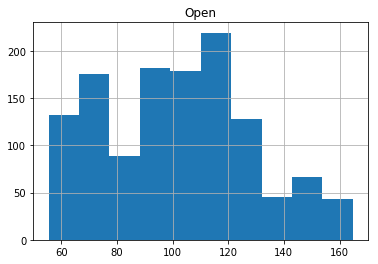

In [77]:
apple_stocks[['Open']].hist()

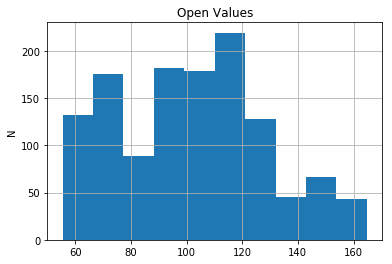

In [79]:
def plot_by(dataset, column='Open', bins_count=10):
    plot = apple_stocks[column].hist(bins=bins_count)
    
    # Plot settings.
    pyplot.title('%s Values' % column)
    pyplot.ylabel('N')

from ipywidgets import interact, fixed
interact(
    plot_by,
    dataset=fixed(apple_stocks),
    column=apple_stocks.columns.tolist(),
    bins_count=(5,50)
);